# Iris Flower Classification Project for Data Science

## Introduction

I need a job. In order to get a job in our modern times, you can't simply have a M.Sc., or even a Ph.D.  <br/>
No, what you need are **Projects**, because otherwise, whose going to know that you can write code? <br/>
I'm currently a student for a M. Sc. in applied mathematics, and I've been interested in data science for quite some time since it involves several interests of mine, like numerical analysis, probability, linear algebra, etc. Although the theoretical background behind data science is interesting, almost nobody in the industry really cares. <br/>

## Project Objective

The objective of this project is mainly to understand the basics of data science, or at least, understand how to analyze and visualize data, while also developing machine learning models for classification problems. <br/>
I've started on the Iris flower dataset, which beginners widely use (originally used by Ronald Fischer in 1936). I thought it would be a good start for me given its lower sample size and its widespread use. <br/>
For now, this is a work in progress, until I feel like I've done all the basic things I can do. I'll probably add machine learning models in the future, as well as embellishing and adding more information on my project if needed.

## 1. Understanding the data

Before we start working with the dataset itself, we need the following libraries: <br/>
* **NumPy** - Used for scientific computation.
* **Pandas** - Used for data manipulation and analysis.
* **Matplotlib.pyplot** - Used for visualizing plots and charts.
* **Seaborn** - Used for statsitical data visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A very useful library to help us with analyzing our data will be **Scikit-learn**, and it shall be used sporadically throughout this project when we want to apply a specific ML model to our data.

We have saved our dataset as "IRIS.csv". In order to apply it on our code, we simply write:

In [3]:
data = pd.read_csv('IRIS.csv')

To first look at the data we have, we write:

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We find that we have the following data columns: **sepal length**, **sepal width**, **petal length**, **petal width**, and **species**. </br> 
We can find more information about the data by simply writing:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We can see that we have 150 entries, without any missing data. The data type used for the lengths and widths is float, but with species we have "object", referring to string type.

Although this already shows us that we have no null values in our dataset, we could find out about missing values by using the command:

In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

*Explenation:* The command .isnull() generates a boolean dataframe, where an entry is True if it's null, and False if it isn't. The command .sum() returns the sum of the values. Each True entry is valued 1, and each False entry is valued 0. 

Additionaly, we may want to check if there are any duplicate rows in our data. In order to check that, we simply do:

In [14]:
data.duplicated().sum()

np.int64(3)

We have 3 duplicated rows! To find which rows are duplicated, we write:

In [13]:
data[data.duplicated(keep = False)]

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


*Explanation:* The command data.duplicated(keep = False) gives a boolean dataframe, where True indicates a duplicate row, and False indicates a unqiue row.

In [15]:
data.duplicated(keep = False)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

By inserting the above command inside the data, as we did in line 13, we get all the duplicated rows.

So far, we know that our dataset has 150 rows and 5 columns, without any null values, and 3 duplicated rows. <br/> 
Next, we want to check the statistics of our data. To do so, we write:

In [16]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The function .describe() brings us the following statistics for each column:

* **count** - The number of non-null values.
* **mean** - The average value.
* **std** - The standard deviation. i.e., spread of data (variance = std squared)
* **min** - The minimum value.
* **25%** - The 25th percentile (first quartile).
* **50%** - The 50th percentile (median).
* **75%** - The 75th percentile (third quartile).
* **max** - The maximam value.

We can include additional information for strings by using the command:


In [17]:
data.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Which brings us:
* **unique** - The number of distinct values.
* **top** - The most frequently occurring value.
* **freq** - The frequency of the most frequently occurring value.

## 2. Visualizing the data

Now it's time to visualize our data. To view the histogram (i.e., the distrubtion of the data), we simply write:

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

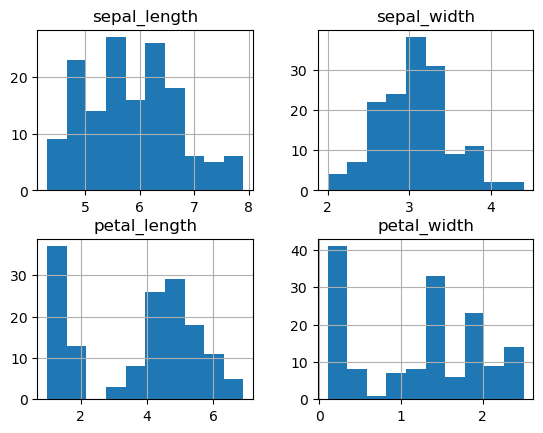

In [25]:
data.hist()

The default number of bins is 10, though we can change the number of bins by writing:

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

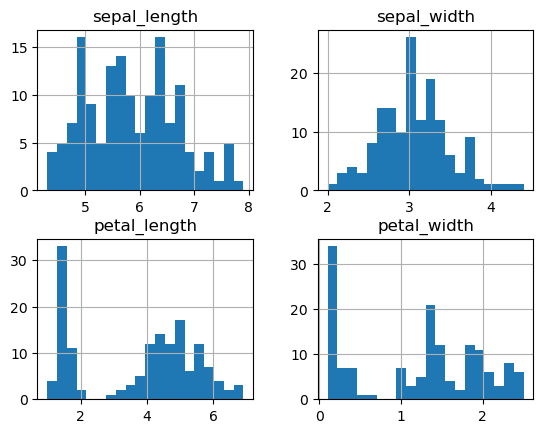

In [31]:
data.hist(bins = 20)

We can use Seaborn to plot pairwise relationships between data. For that, we write:

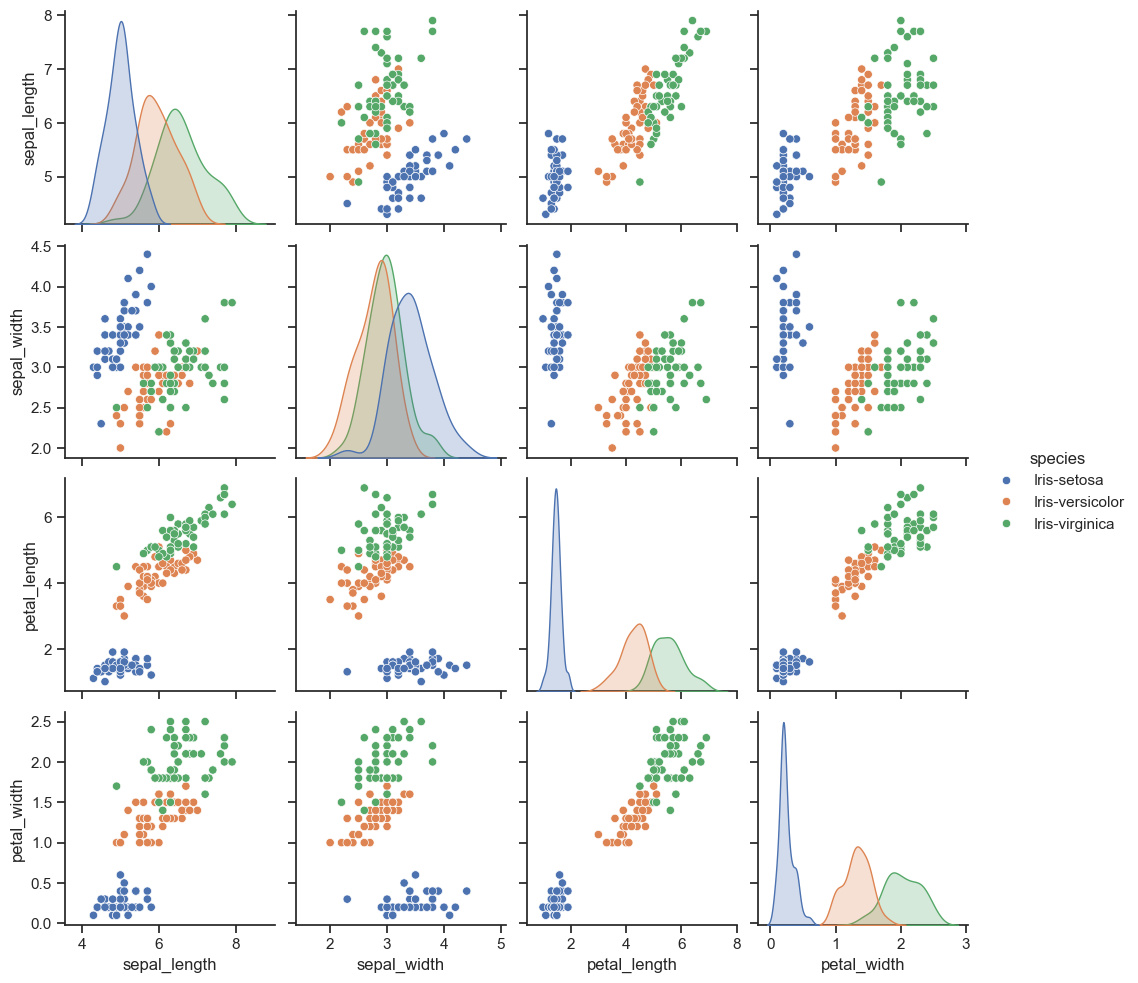

In [32]:
sns.set(style = "ticks")
sns.pairplot(data, hue = "species")

The plots on the diagonal are layered kernel density estimations. We can instead replace them with histograms:

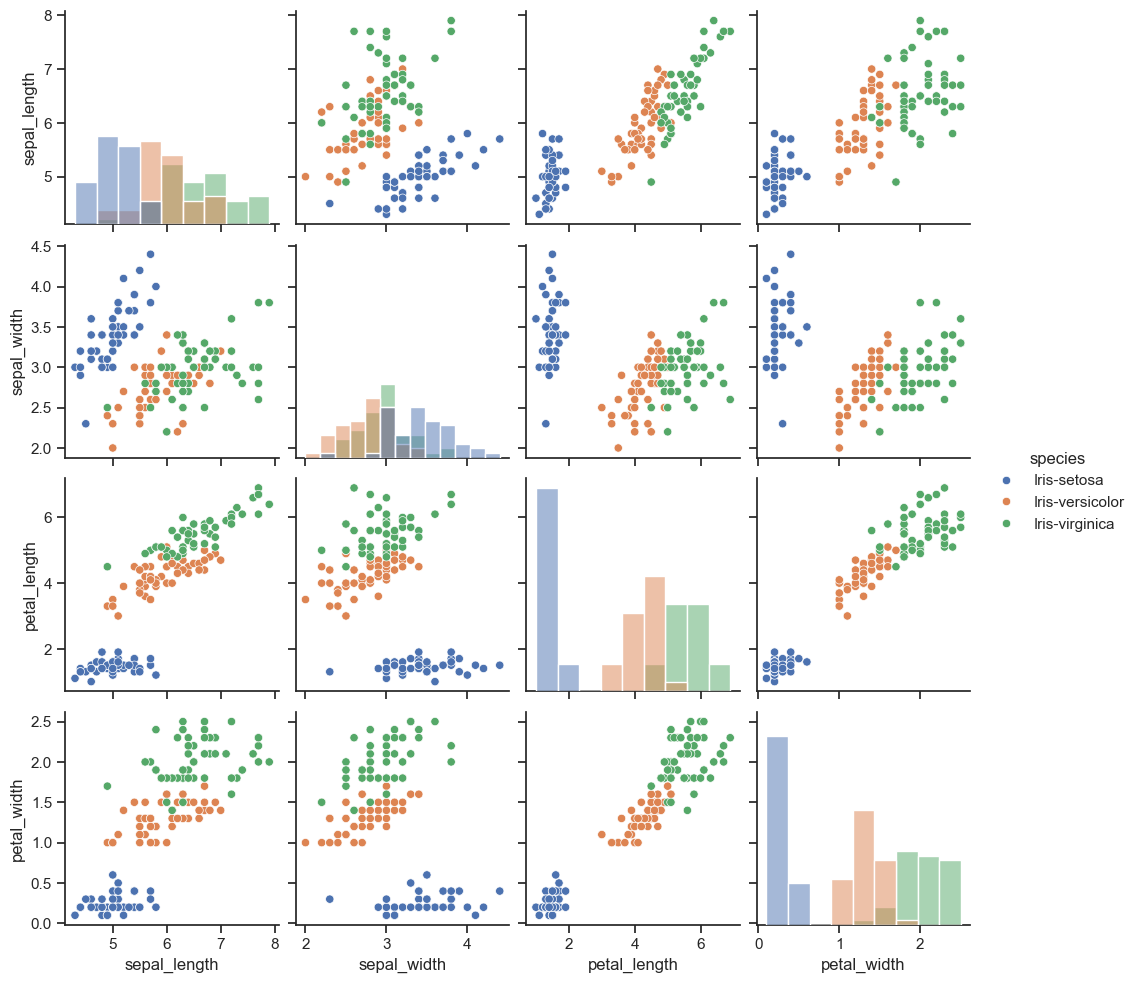

In [50]:
sns.pairplot(data, hue = "species", diag_kind = "hist")

If we want to specify, say, the speal length vs sepal width, we simply write:

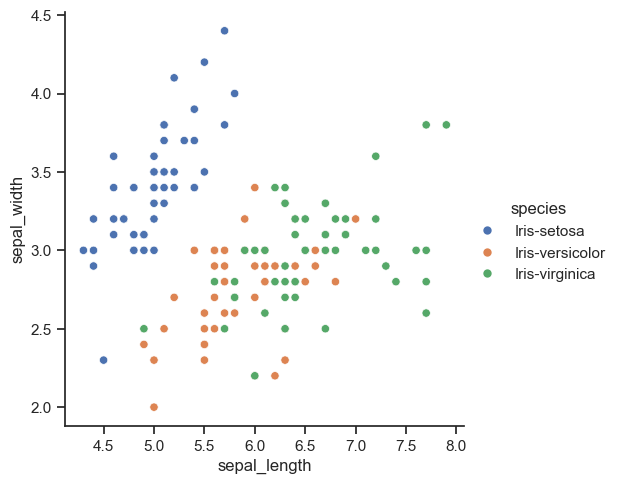

In [34]:
sns.relplot(data, x ="sepal_length", y = "sepal_width", hue = "species")

And for petal length vs petal width:

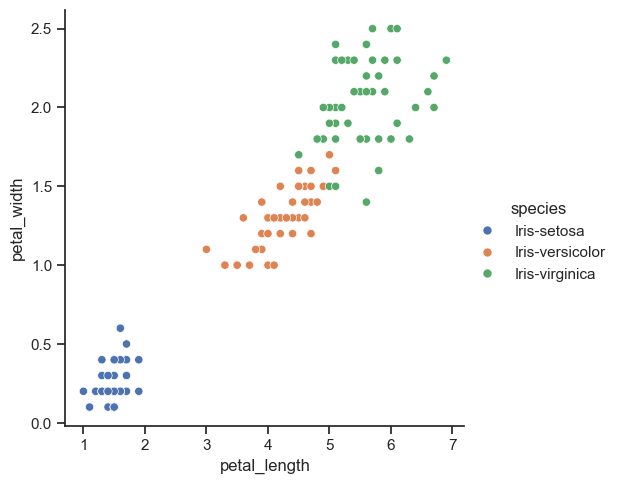

In [36]:
sns.relplot(data, x ="petal_length", y = "petal_width", hue = "species")

From the given visualization, we can already distinguish between the Iris Setosa species, and seems like we can differentiate between the Iris Versicolor and Iris Virginica, if we follow plots like petal length vs petal wdith, or petal length vs sepal width. This may help us understand the right prediction model for the given data.

Another useful tool in analyzing our data is the correlation matrix. This matrix helps us understand the relationship between each of the variables in our dataset. <br/>
Given a paired dataset $\{ (x_1, y_1), ..., (x_n, y_n) \}$, the sample correlation coefficient $r_{xy}$ is defined as:

$$r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sigma_x \sigma_y}$$

Where:
* $n$ is the sample size
*  $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$ is the sample mean of $x = \{x_1 ,..., x_n \}$
*  $\sigma_x = \sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}$ is the standard deviation of $x$

From the definition of the correlation coefficient, we can derive that $r_{xy}$ is valued from $-1$ to $1$. If $x = y$, then $r_{xx} = 1$. <br/? This coefficient helps us determinne which variables are correlated, given that:
* If $r_{xy} = 1$, then the relationship is postively strong (i.e., all the points lie on a straight line with a positive slope).
* If $r_{xy} = -1$, then the relationship is negatively strong (i.e., all the points lie on a straight line with a negative slope).
* If $r_{xy} = 0$, then there's no linear depedency between the variables. <br/>
This means that, for example, if $r_{xy}$ is very close to 1 or to -1, that means that $x$ and $y$ are almost linearly dependant. <br/>
The correlation matrix has the correlation coefficient of each of its data columns. From the definition, we can conclude that it's a symmetric matrix, whose values at the diagonal are all 1. Although we have a function .corr() to create the matrix, it only works on dataframes with float dataype. Thus, if we would've applied the function to our data, we would get a value error:

In [37]:
correlation_matrix = data.corr()

ValueError: could not convert string to float: 'Iris-setosa'

That is why we need to delete the column "species", by using the function .drop, like so:

In [38]:
correlation_matrix = data.drop(columns = ['species']).corr()

Printing the matrix, we find:

In [40]:
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


But it's more convenient to visualize it using a heatmap:

Text(0.5, 1.0, 'correlation matrix heatmap')

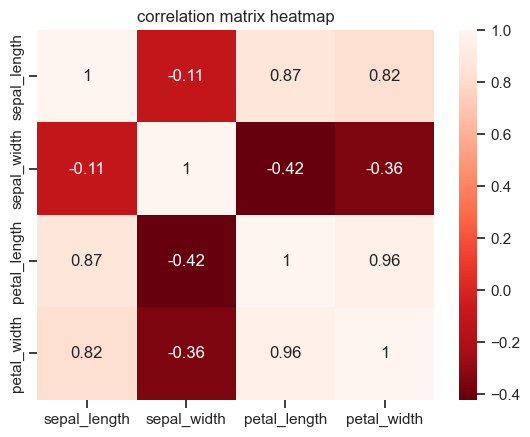

In [44]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'Reds_r')
plt.title("correlation matrix heatmap")

Notice that the correlation matrix is symmetric, and the values at the diagonal are always 1. Thus, we can simplify the heatmap by converting the matrix to an upper triangular matrix, which preserves the values given that the matrix is symmmetric. <br/>
First, we make a matrix with only the value 1, which has the same size as the correlation matrix:

In [47]:
np.ones_like(correlation_matrix)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

Next, we isolate the matrix into an upper triangular matrix, like so:

In [48]:
np.triu(np.ones_like(correlation_matrix))

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

Now we can convert the matrix into a boolean matrix, and use it for our heatmap function, like so:

<Axes: >

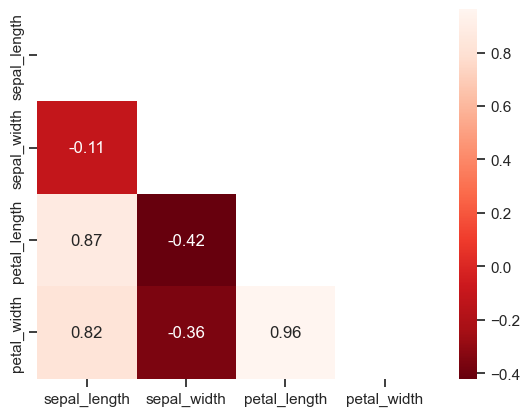

In [49]:
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))
sns.heatmap(correlation_matrix, mask = mask, annot = True, cmap = 'Reds_r')

We can conclude from this graph that there's a strong linear dependence between:
* petal length and petal width ($r_{xy} = 0.96$)
* petal length and sepal length ($r_{xy} = 0.87$)
* petal width and sepal length ($r_{xy} = 0.82$)

This is going to help us with using linear models for the specified relations.